In [1]:
import os
from eazy import filters, utils
import numpy as np
import eazy
import importlib
import sys
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# quiet numpy/astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning

np.seterr(all='ignore')
warnings.simplefilter('ignore', category=AstropyWarning)

In [2]:
print('eazy.utils.DATA_PATH = [...]/' + '/'.join(eazy.utils.DATA_PATH.split('/')[3:]))

if not os.path.exists(eazy.utils.DATA_PATH):
    eazy.fetch_eazy_photoz()

eazy.utils.DATA_PATH = [...]/data2/deklerk/GAAP_data/.venv/lib64/python3.12/site-packages/eazy/data/eazy-photoz


In [3]:
from eazy import filters, utils
from eazy.utils import DATA_PATH
res = filters.FilterFile(os.path.join(DATA_PATH,
                         'filters/FILTER.RES.latest'))
print(res.NFILT)
for i in range(res.NFILT):
    print(f'{i+1} {res.filters[i].name}')

424
1 hst/ACS_update_sep07/wfc_f435w_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 4.3179e+03 AB-Vega=-0.104 w95=993.1
2 hst/ACS_update_sep07/wfc_f475w_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 4.7453e+03 AB-Vega=-0.101 w95=1412.8
3 hst/ACS_update_sep07/wfc_f555w_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 5.3601e+03 AB-Vega=-0.009 w95=1260.9
4 hst/ACS_update_sep07/wfc_f606w_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 5.9194e+03 AB-Vega= 0.082 w95=2225.4
5 hst/ACS_update_sep07/wfc_f775w_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 7.6933e+03 AB-Vega= 0.385 w95=1490.9
6 hst/ACS_update_sep07/wfc_f814w_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 8.0599e+03 AB-Vega= 0.419 w95=2359.0
7 hst/ACS_update_sep07/wfc_f850lp_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 9.0364e+03 AB-Vega= 0.519 w95=2096.6
8 hst/nicmos_f110w.dat synphot-calcband lambda_c= 1.1234e+04 AB-Vega= 0.725 w95=5536.9
9 hst/nicmos_f160w.dat synphot-calcband lambda_c= 1.6037e+04 AB-Vega= 1.306 w95=3864.6
10 hst/wfpc2_f300

In [4]:
print(DATA_PATH)
params = {}
params['CATALOG_FILE'] = os.path.join(DATA_PATH, 'inputs', 'hdfn_fs99_eazy.cat')

params['MAIN_OUTPUT_FILE'] = 'hdfn.eazypy'

# Galactic extinction
params['MW_EBV'] = 0.0103
params['CAT_HAS_EXTCORR'] = True

params['Z_STEP'] = 0.01
params['Z_MIN'] = 0.01
params['Z_MAX'] = 6.

params['PRIOR_ABZP'] = 25
params['PRIOR_FILTER'] = 28 # K
params['PRIOR_FILE'] = os.path.join(DATA_PATH, 'templates/prior_K_TAO.dat')

params['TEMPLATES_FILE'] = os.path.join(DATA_PATH, 'templates/fsps_full/tweak_fsps_QSF_12_v3.param')

params['FIX_ZSPEC'] = False

params['IGM_SCALE_TAU'] = 1.0

translate_file = os.path.join(DATA_PATH, 'inputs', 'zphot.translate')

/net/vdesk/data2/deklerk/GAAP_data/.venv/lib64/python3.12/site-packages/eazy/data/eazy-photoz


In [5]:
from eazy.photoz import PhotoZ

self = PhotoZ(
    param_file=None,
    translate_file=translate_file,
    zeropoint_file=None,
    params=params,
    load_prior=True,
    load_products=False
)

Read default param file: /net/vdesk/data2/deklerk/GAAP_data/.venv/lib64/python3.12/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: /net/vdesk/data2/deklerk/GAAP_data/.venv/lib64/python3.12/site-packages/eazy/data/eazy-photoz/inputs/hdfn_fs99_eazy.cat
   >>> NOBJ = 1067
f_f300w e_f300w ( 10): hst/wfpc2_f300w.dat
f_f450w e_f450w ( 12): hst/wfpc2_f450w.dat
f_f606w e_f606w ( 14): hst/wfpc2_f606w.dat
f_f814w e_f814w ( 16): hst/wfpc2_f814w.dat
f_irimj e_irimj ( 26): KPNO/IRIMJ
f_irimh e_irimh ( 27): KPNO/IRIMH
f_irimk e_irimk ( 28): KPNO/IRIMK
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  /net/vdesk/data2/deklerk/GAAP_data/.venv/lib64/python3.12/site-packages/eazy/data/eazy-photoz/templates/prior_K_TAO.dat
Template grid: /net/vdesk/data2/deklerk/GAAP_data/.venv/lib64/python3.12/site-packages/eazy/data/eazy-photoz/templates/fsps_full/tweak_fsps_QSF_12_v3.param (this may take some time)


100%|██████████| 12/12 [00:03<00:00,  3.03it/s]


Template   0: tweak_fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: tweak_fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: tweak_fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: tweak_fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: tweak_fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: tweak_fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: tweak_fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: tweak_fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: tweak_fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: tweak_fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: tweak_fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: tweak_fsps_QSF_12_v3_012.dat (NZ=1).
Process templates: 4.245 s


194it [00:00, 7034.20it/s]


Iteration:  0


100%|██████████| 194/194 [00:02<00:00, 84.79it/s]


Compute best fits
fit_best: 0.1 s (n_proc=1,  NOBJ=637)
Fit 2.4 s (n_proc=8, NOBJ=645)
Iterative correction - zeropoint / template
Iteration:  1


100%|██████████| 194/194 [00:02<00:00, 83.43it/s]


Compute best fits
fit_best: 0.1 s (n_proc=1,  NOBJ=638)
Fit 2.5 s (n_proc=8, NOBJ=645)
Iterative correction - zeropoint / template
Iteration:  2


100%|██████████| 194/194 [00:02<00:00, 83.99it/s]


Compute best fits
fit_best: 0.1 s (n_proc=1,  NOBJ=637)
Fit 2.5 s (n_proc=8, NOBJ=645)
Iterative correction - zeropoint / template


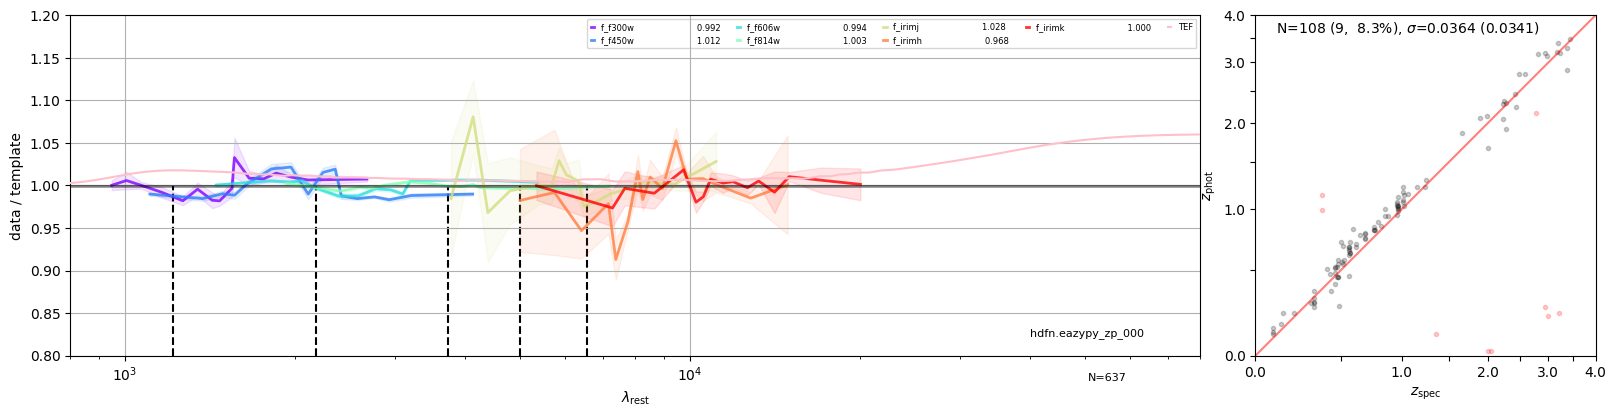

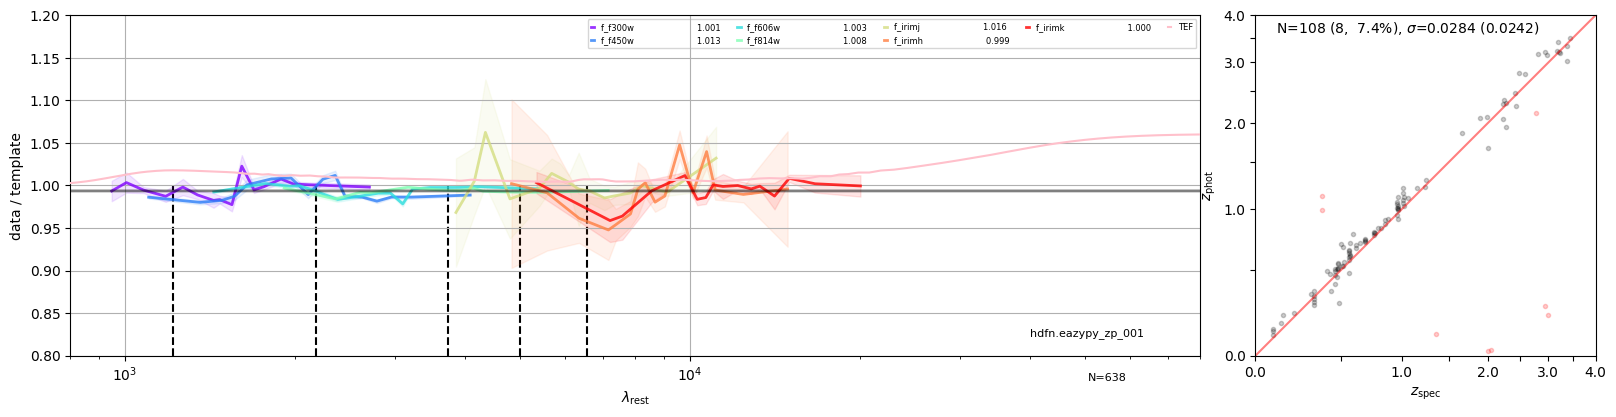

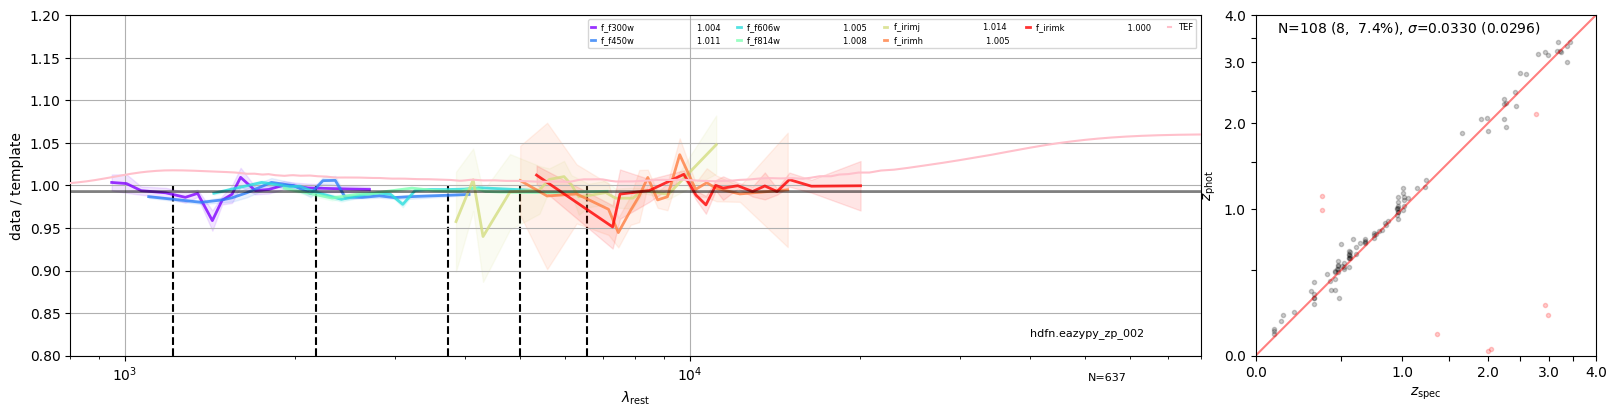

In [6]:
NITER = 3
NBIN = np.minimum(self.NOBJ//100, 180)

self.param.params['VERBOSITY'] = 1.
for iter_ in range(NITER):
    print('Iteration: ', iter_)

    sn = self.fnu/self.efnu
    clip = (sn > 1).sum(axis=1) > 4 # Generally make this higher to ensure reasonable fits

    self.iterate_zp_templates(
        idx=self.idx[clip],
        update_templates=False, # (iter_ > 0),
        update_zeropoints=True,
        iter=iter_,
        n_proc=8,
        save_templates=False,
        error_residuals=False,
        NBIN=NBIN,
        get_spatial_offset=False
    )

In [7]:
# Turn off error corrections derived above
self.set_sys_err(positive=True)

# Full catalog
sample = np.isfinite(self.ZSPEC)

# fit_parallel renamed to fit_catalog 14 May 2021
self.fit_catalog(self.idx[sample], n_proc=8)

Set sys_err = 0.01 (positive=True)


100%|██████████| 194/194 [00:03<00:00, 50.99it/s]

Compute best fits
fit_best: 0.1 s (n_proc=1,  NOBJ=1020)
Fit 4.0 s (n_proc=8, NOBJ=1067)


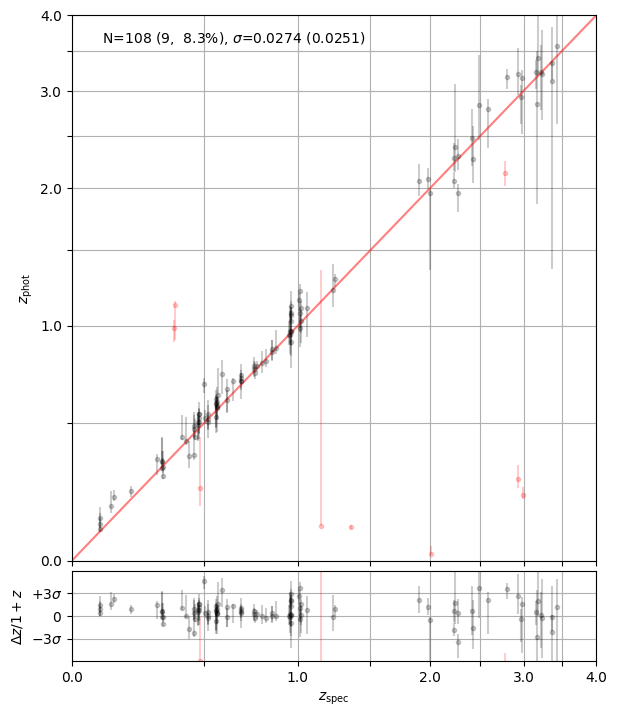

In [8]:
# Show zspec-zphot comparison
fig = self.zphot_zspec()

In [9]:
# Derived parameters (z params, RF colors, masses, SFR, etc.)
warnings.simplefilter('ignore', category=RuntimeWarning)

zout, hdu = self.standard_output(
    simple=False,
    rf_pad_width=0.5,
    rf_max_err=2,
    prior=True,
    beta_prior=True,
    absmag_filters=[],
    extra_rf_filters=[]
)

# 'zout' also saved to [MAIN_OUTPUT_FILE].zout.fits

Get best fit coeffs & best redshifts
fit_best: 0.5 s (n_proc=1,  NOBJ=1050)
Get parameters (UBVJ=[153, 154, 155, 161], simple=False)


100%|██████████| 1050/1050 [00:02<00:00, 357.39it/s]


Text(0, 0.5, '$(U-V)_0$')

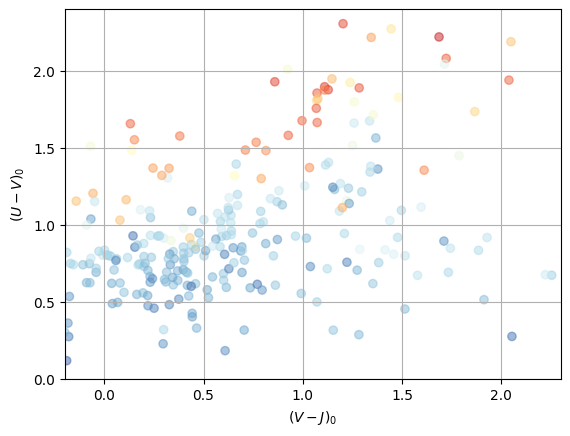

In [10]:
# Show UVJ diagram
uv = -2.5*np.log10(zout['restU']/zout['restV'])
vj = -2.5*np.log10(zout['restV']/zout['restJ'])
ssfr = zout['sfr']/zout['mass']

sel = (zout['z_phot'] > 0.2) & (zout['z_phot'] < 1)
plt.scatter(vj[sel], uv[sel], c=np.log10(ssfr)[sel],
            vmin=-13, vmax=-8, alpha=0.5, cmap='RdYlBu')

plt.xlim(-0.2, 2.3); plt.ylim(0, 2.4); plt.grid()
plt.xlabel(r'$(V-J)_0$'); plt.ylabel(r'$(U-V)_0$')

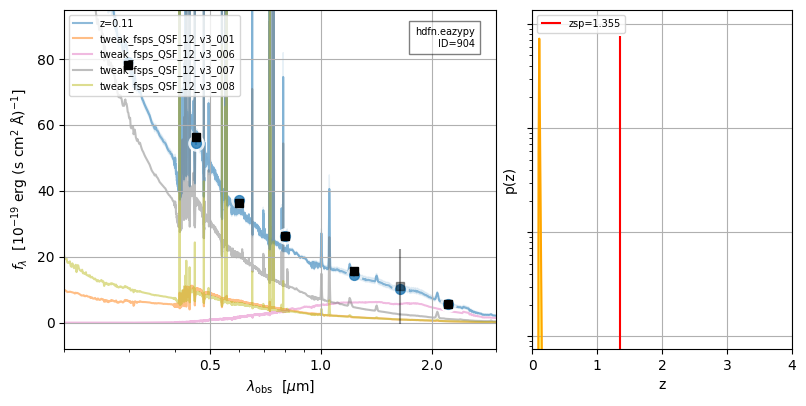

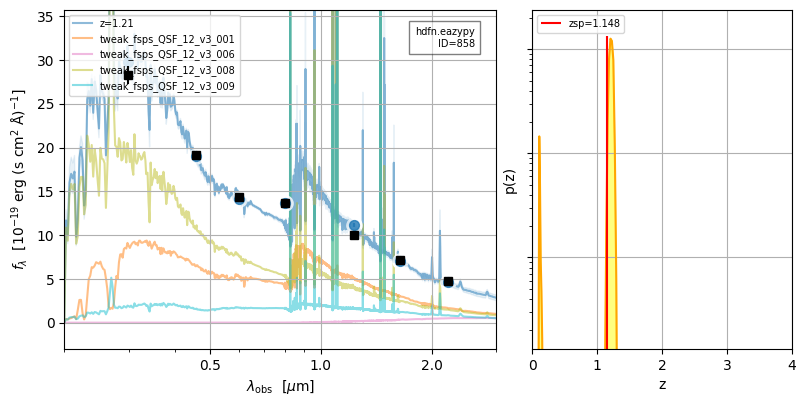

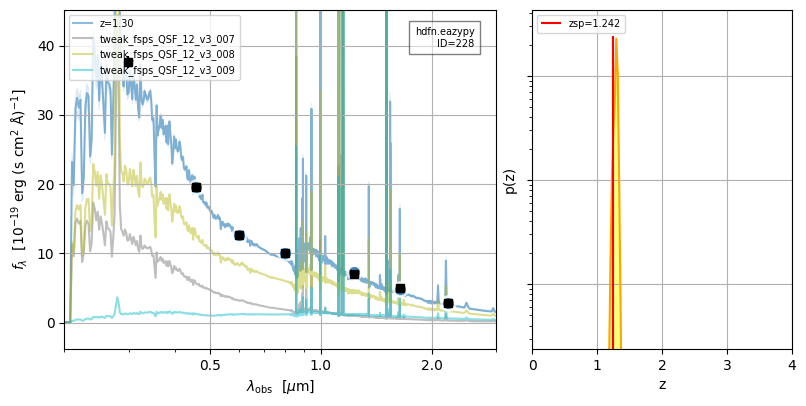

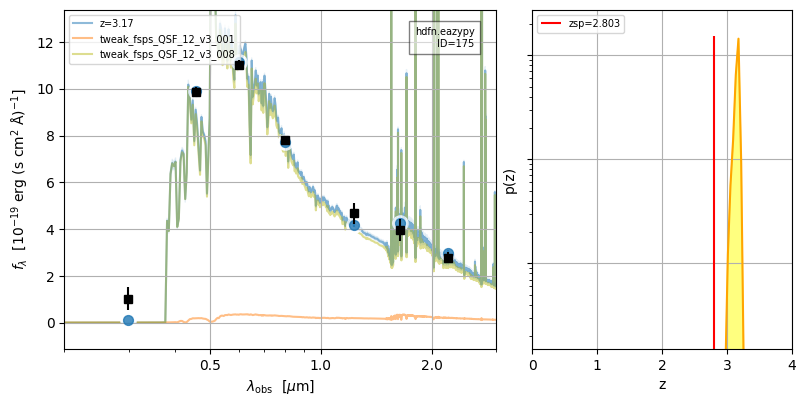

In [11]:
# Show brightest objects with z_spec > 1

ifilter = self.flux_columns[np.argmin((self.lc - 8140)**2)]

imag = params['PRIOR_ABZP'] - 2.5*np.log10(self.cat[ifilter])
sel = (self.ZSPEC > 1.1)

so = np.argsort(imag[sel])
ids = self.OBJID[sel][so]

for i in range(4):
    fig, data = self.show_fit(ids[i], xlim=[0.2, 3], show_components=True,
                              logpz=True, zr=[0,4])

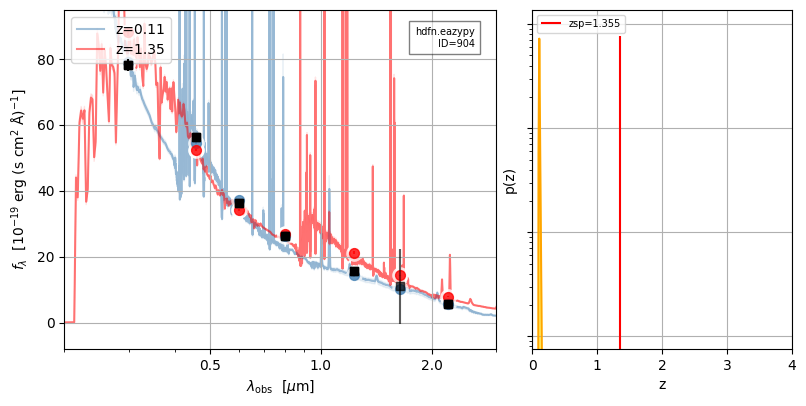

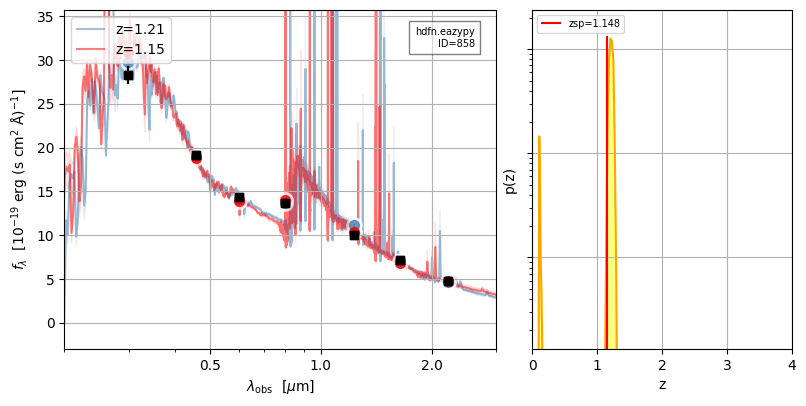

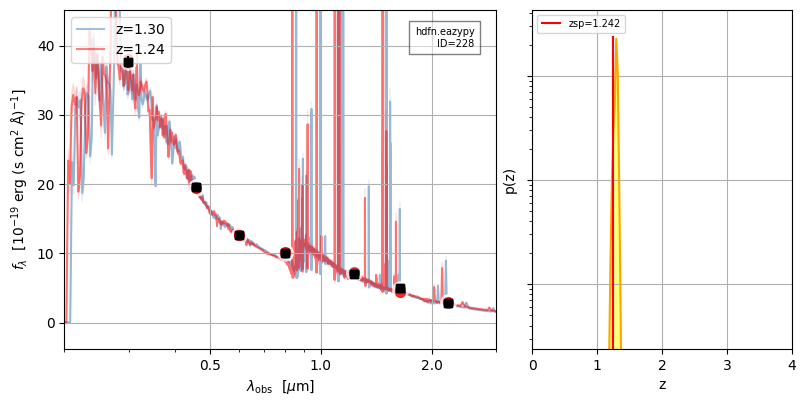

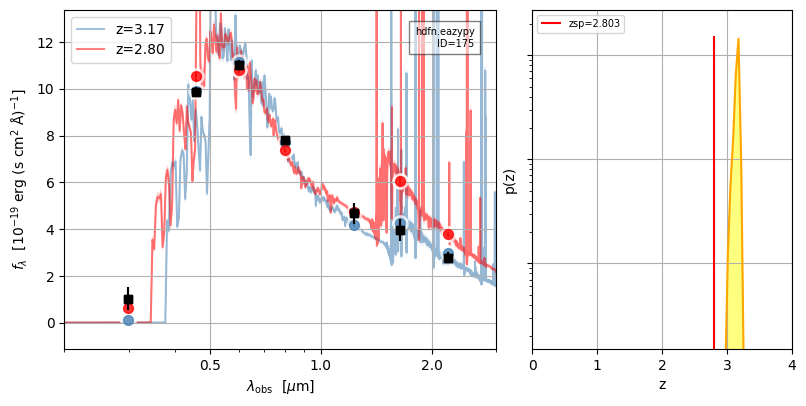

In [12]:
# Compare forced fit at z_spec
for i in range(4):
    ix = np.where(self.OBJID == ids[i])[0][0]
    fig, data = self.show_fit(ids[i], xlim=[0.2, 3],
                        show_components=False,
                        template_color='steelblue', logpz=True, zr=[0,4])

    # Now show with z_spec
    axes = fig.axes[:1]
    res = self.show_fit(ids[i], xlim=[0.2, 3], axes=axes,
                        zshow=self.ZSPEC[ix],
                        show_components=False,
                        template_color='r')

    axes[0].legend(loc='upper left')

In [13]:
zout.meta

{'version': ('0.8.5', 'Eazy-py version'),
 'prior': (True,
  'Prior applied (/net/vdesk/data2/deklerk/GAAP_data/.venv/lib64/python3.12/site-packages/eazy/data/eazy-photoz/templates/prior_K_TAO.dat)'),
 'betprior': (True, 'Beta prior applied'),
 'fitter': ('nnls', 'Optimization method for template fits'),
 'SYS_ERR': 0.01,
 'TEMP_ERR_FILE': 'templates/uvista_nmf/template_error_10.def',
 'TEMP_ERR_A2': 0.2,
 'PRIOR_FILTER': 28,
 'PRIOR_ABZP': 25,
 'IGM_SCALE_TAU': 1.0,
 'APPLY_IGM': 'y',
 'TEMPLATES_FILE': '/net/vdesk/data2/deklerk/GAAP_data/.venv/lib64/python3.12/site-packages/eazy/data/eazy-photoz/templates/fsps_full/tweak_fsps_QSF_12_v3.param',
 'RENORM_TEMPLATES': 'y',
 'HESS_THRESHOLD': 1.0,
 'TEMPL000': 'tweak_fsps_QSF_12_v3_001.dat',
 'TEMPL001': 'tweak_fsps_QSF_12_v3_002.dat',
 'TEMPL002': 'tweak_fsps_QSF_12_v3_003.dat',
 'TEMPL003': 'tweak_fsps_QSF_12_v3_004.dat',
 'TEMPL004': 'tweak_fsps_QSF_12_v3_005.dat',
 'TEMPL005': 'tweak_fsps_QSF_12_v3_006.dat',
 'TEMPL006': 'tweak_fsps_Q

In [14]:
zout.info()

<GTable length=1067>
    name     dtype  shape       unit       format        description        
----------- ------- ----- ---------------- ------ --------------------------
         id   int64                                                         
     z_spec float64                                                         
   nusefilt   int64                                                         
       z_ml float32                                                         
  z_ml_chi2 float32                                                         
  z_ml_risk float32                                                         
     lc_min float64                           .1f                           
     lc_max float64                           .1f                           
     z_phot float32                                                         
z_phot_chi2 float32                                                         
z_phot_risk float32                                    

In [15]:
field = '53.0_-28.0'
fluxes = pd.read_csv(f'/net/vdesk/data2/deklerk/GAAP_data/{field}/fluxes.csv')

In [16]:
for col in fluxes.columns:
    print('flux_{0:<11s} F00\nerr_{0:<12s} E00'.format(col))

flux_ra          F00
err_ra           E00
flux_dec         F00
err_dec          E00
flux_aperture_size F00
err_aperture_size E00
flux_flux_u      F00
err_flux_u       E00
flux_flux_u_sigma F00
err_flux_u_sigma E00
flux_flux_g      F00
err_flux_g       E00
flux_flux_g_sigma F00
err_flux_g_sigma E00
flux_flux_r      F00
err_flux_r       E00
flux_flux_r_sigma F00
err_flux_r_sigma E00
flux_flux_i      F00
err_flux_i       E00
flux_flux_i_sigma F00
err_flux_i_sigma E00
flux_flux_z      F00
err_flux_z       E00
flux_flux_z_sigma F00
err_flux_z_sigma E00
flux_flux_y      F00
err_flux_y       E00
flux_flux_y_sigma F00
err_flux_y_sigma E00
flux_flux_VIS    F00
err_flux_VIS     E00
flux_flux_VIS_sigma F00
err_flux_VIS_sigma E00
flux_flux_DES-G  F00
err_flux_DES-G   E00
flux_flux_DES-G_sigma F00
err_flux_DES-G_sigma E00
flux_flux_DES-R  F00
err_flux_DES-R   E00
flux_flux_DES-R_sigma F00
err_flux_DES-R_sigma E00
flux_flux_DES-I  F00
err_flux_DES-I   E00
flux_flux_DES-I_sigma F00
err_flux_DES-I_sig